In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model

In [199]:
df = pd.read_csv('./album_info.csv')

# Columns: review_url, name, author, label, pub_date, body, title, score, release_year, genre, popularity, uri

df_numeric = df.drop(['review_url', 'name','author', 'label', 'pub_date', 'body', 'title', 'genre', 'uri'], axis=1)
df_numeric = df_numeric.dropna()
print(df_numeric)

# Split the data
X = df_numeric.drop('score', axis=1)
y = df_numeric['score']

       Unnamed: 0  score  release_year  popularity
0               0    7.2          2019        74.0
1               1    5.8          2018        34.0
2               2    8.0          2018        60.0
3               3    7.5          2019        60.0
4               4    7.5          2020        60.0
...           ...    ...           ...         ...
21391       21395    7.4          2020        24.0
21392       21396    6.9          2018        55.0
21393       21397    7.7          2021        17.0
21394       21398    7.7          2018        17.0
21395       21399    9.0          1973        66.0

[21213 rows x 4 columns]


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [221]:
! brew install graphviz


Running `brew update --auto-update`...
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:02180ca8b8295422ae84921bcf034b7ee8ce5575488bd5e6a37a192e53cd5d34
######################################################################### 100.0%                                      30.6%
==> Pouring portable-ruby-3.1.4.el_capitan.bottle.tar.gz
Installing from the API is now the default behaviour!
You can save space and time by running:
  brew untap homebrew/core
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
argc                drogon              open-simh           retire
dalfox              ocaml@4             pdfrip              yatas
==> New Casks
anka-build-cloud-controller              notes-better
anka-build-cloud-registry                nx-studio
brightintosh                             october
cardo-update                             screens-assist
focusrite-control-2                      senabluetoothdevi

######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libavif/manifests/1.0.3
######################################################################### 100.0%
==> Fetching libavif
==> Downloading https://ghcr.io/v2/homebrew/core/libavif/blobs/sha256:b7f7327ef7
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/gd/manifests/2.3.3_6
######################################################################### 100.0%
==> Fetching gd
==> Downloading https://ghcr.io/v2/homebrew/core/gd/blobs/sha256:4921f275ca5a840
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pcre2/manifests/10.42
######################################################################### 100.0%
==> Fetching pcre2
==> Downloading https://ghcr.io/v2/homebrew/core/pcre2/blobs/sha256:76ccbd45954e
#

######################################################################### 100.0%
==> Fetching graphite2
==> Downloading https://ghcr.io/v2/homebrew/core/graphite2/blobs/sha256:3469eaae
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/icu4c/manifests/73.2
######################################################################### 100.0%
==> Fetching icu4c
==> Downloading https://ghcr.io/v2/homebrew/core/icu4c/blobs/sha256:56abe168ef97
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/harfbuzz/manifests/8.3.0
######################################################################### 100.0%
==> Fetching harfbuzz
==> Downloading https://ghcr.io/v2/homebrew/core/harfbuzz/blobs/sha256:12047b680
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pango/manifest

==> Pouring little-cms2--2.15.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/little-cms2/2.15: 21 files, 1.3MB
==> Installing graphviz dependency: openexr
==> Downloading https://ghcr.io/v2/homebrew/core/openexr/manifests/3.2.1
Already downloaded: /Users/simoncook/Library/Caches/Homebrew/downloads/5b8bbf02d04feb2a6e9c578e606f8aeacce2f261c79900426f7bc1d2b0c1717e--openexr-3.2.1.bottle_manifest.json
==> Pouring openexr--3.2.1.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/openexr/3.2.1: 204 files, 7.8MB
==> Installing graphviz dependency: webp
==> Downloading https://ghcr.io/v2/homebrew/core/webp/manifests/1.3.2
Already downloaded: /Users/simoncook/Library/Caches/Homebrew/downloads/952907f186b4d32b3e43b7af1c9e93bd484f9b61db1adb22b5fb4a5361cdd0e9--webp-1.3.2.bottle_manifest.json
==> Pouring webp--1.3.2.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/webp/1.3.2: 63 files, 2.6MB
==> Installing graphviz dependency: jpeg-xl
==> Downloading https://ghcr.io/v2/homebrew/core/jpeg-xl/manifests/0.8.2_1-1
Alr

🍺  /usr/local/Cellar/libx11/1.8.7: 1,042 files, 6.9MB
==> Installing graphviz dependency: libxext
==> Downloading https://ghcr.io/v2/homebrew/core/libxext/manifests/1.3.5
Already downloaded: /Users/simoncook/Library/Caches/Homebrew/downloads/36b14aebd45b8fbf0f965d846bbc5126adbe882c0775c9936edb0432b347b9a1--libxext-1.3.5.bottle_manifest.json
==> Pouring libxext--1.3.5.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/libxext/1.3.5: 87 files, 427.2KB
==> Installing graphviz dependency: libxrender
==> Downloading https://ghcr.io/v2/homebrew/core/libxrender/manifests/0.9.11
Already downloaded: /Users/simoncook/Library/Caches/Homebrew/downloads/134c11be8346a1b116e04983c2da6366f29c4f4c2abc17604dcdb80d0475ae9d--libxrender-0.9.11.bottle_manifest.json
==> Pouring libxrender--0.9.11.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/libxrender/0.9.11: 12 files, 198.2KB
==> Installing graphviz dependency: lzo
==> Downloading https://ghcr.io/v2/homebrew/core/lzo/manifests/2.10
Already downloaded: /Users/simonc

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


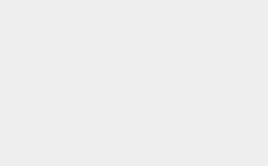

In [223]:
from keras.utils import plot_model
import os

# Assuming 'model' is the Sequential model defined above

# Specify the absolute path to save the plot
plot_file_path = os.path.abspath('./model_plot.png')

# Plot the model architecture and save it as an image
plot_model(model, to_file=plot_file_path, show_shapes=True, show_layer_names=True)

# Display the plot (optional)
from IPython.display import Image, display
display(Image(filename=plot_file_path))


In [201]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Adjust dropout rate
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Adjust dropout rate
    layers.Dense(1, activation='linear')  # Use linear activation for regression
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [203]:
# Train prediction model

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
425/425 [==============================] - 2s 2ms/step - loss: 53.3534 - mean_absolute_error: 6.9163 - val_loss: 44.4935 - val_mean_absolute_error: 6.5522
Epoch 2/100
425/425 [==============================] - 1s 2ms/step - loss: 47.6986 - mean_absolute_error: 6.5500 - val_loss: 40.2012 - val_mean_absolute_error: 6.2152
Epoch 3/100
425/425 [==============================] - 1s 2ms/step - loss: 42.7598 - mean_absolute_error: 6.1891 - val_loss: 35.7901 - val_mean_absolute_error: 5.8537
Epoch 4/100
425/425 [==============================] - 1s 2ms/step - loss: 38.0417 - mean_absolute_error: 5.8001 - val_loss: 30.4108 - val_mean_absolute_error: 5.3795
Epoch 5/100
425/425 [==============================] - 1s 2ms/step - loss: 32.8445 - mean_absolute_error: 5.3220 - val_loss: 25.1408 - val_mean_absolute_error: 4.8708
Epoch 6/100
425/425 [==============================] - 1s 2ms/step - loss: 27.7005 - mean_absolute_error: 4.8027 - val_loss: 19.7000 - val_mean_absolute_error: 4.284

425/425 [==============================] - 1s 2ms/step - loss: 2.1006 - mean_absolute_error: 1.1229 - val_loss: 1.4642 - val_mean_absolute_error: 0.9107
Epoch 100/100
425/425 [==============================] - 1s 2ms/step - loss: 2.1050 - mean_absolute_error: 1.1278 - val_loss: 1.4627 - val_mean_absolute_error: 0.9090


133/133 [==============================] - 0s 1ms/step - loss: 1.3644 - mean_absolute_error: 0.8742
Test Mean Absolute Error: 0.8742489218711853


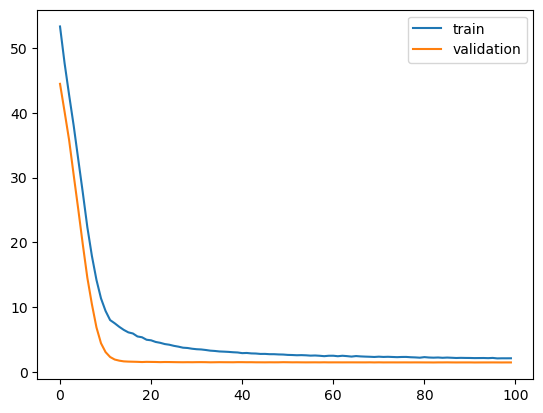

In [205]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f'Test Mean Absolute Error: {test_mae}')

import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

133/133 [==============================] - 0s 949us/step


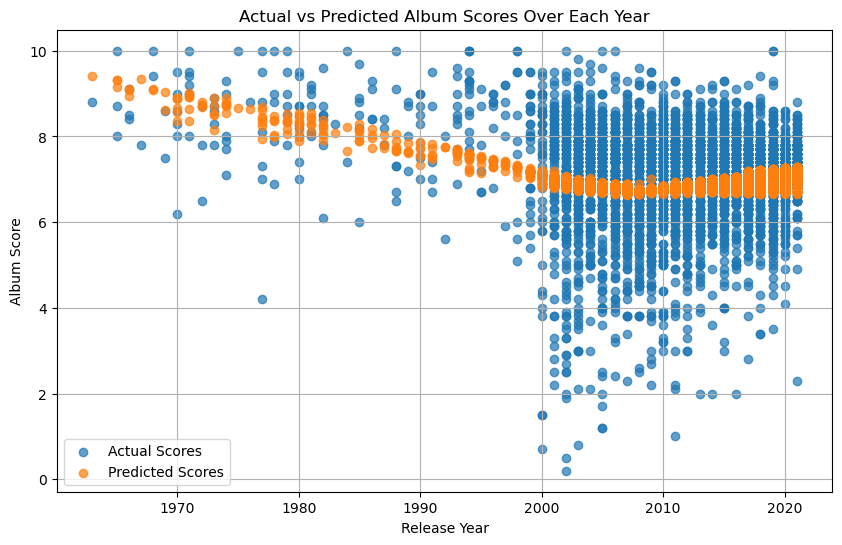

In [206]:
# Step 2: Extract release years for each example
y_pred = model.predict(X_test_scaled)
release_years = X_test['release_year'].values

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(release_years, y_test, label='Actual Scores', alpha=0.7)
plt.scatter(release_years, y_pred, label='Predicted Scores', alpha=0.7)

# Step 4: Customize the plot
plt.title('Actual vs Predicted Album Scores Over Each Year')
plt.xlabel('Release Year')
plt.ylabel('Album Score')
plt.legend()
plt.grid(True)
plt.show()

In [182]:
# Find the index of the album with the lowest predicted score
max_score_index = np.argmax(y_pred)
print(max_score_index)

# Retrieve the album information for the album with the lowest predicted score
album_with_lowest_score = df.iloc[max_score_index]
#album_with_lowest_score = df_numeric.iloc[max_score_index]

# Print or display the information
print("Album with the Lowest Predicted Score:")
print(album_with_lowest_score)

1137
Album with the Lowest Predicted Score:
Unnamed: 0                                                   1137
review_url                         /reviews/albums/11261-on-high/
name                                                    Kate Maki
author                                         Stephen M. Deusner
label                                                       Ow Om
pub_date                                      2008-03-27 06:00:05
body            On High is Kate Maki's U.S. debut, but it's ac...
title                                                     On High
score                                                         6.5
release_year                                                 2008
genre                                                         NaN
popularity                                                    NaN
uri                                                           NaN
Name: 1137, dtype: object


In [207]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 0.874248840661086
MSE: 1.3644230424994466
RMSE: 1.1680852034417037


In [209]:
correlation_coefficient = np.corrcoef(y_test, y_pred.flatten())[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.24074352688470133


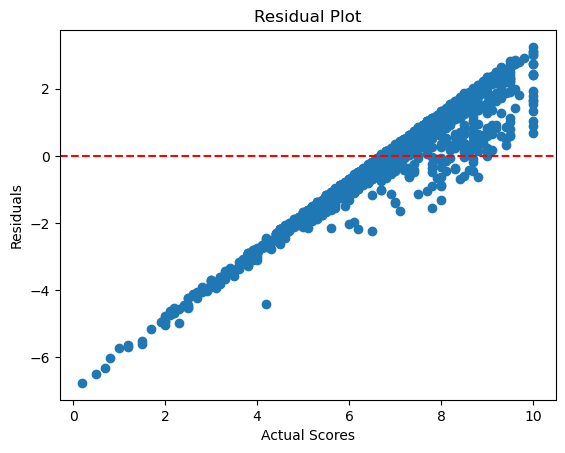

In [211]:
residuals = y_test - y_pred.flatten()

plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Scores')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [183]:
print(sum(y_pred)/len(y_pred))

[46.335754]


In [184]:
print(min(y_pred))

[44.222546]


In [106]:
#PREDICTION

In [165]:
import numpy as np

# Assuming 'new_example' is your new data point
new_example = scaler.transform(np.array([[79, 2000, 100]]))

# Preprocess the new example (apply the same preprocessing as training data)
new_example_scaled = scaler.transform(new_example.reshape(1, -1))  # Reshape to 2D array

# Use the trained model to predict the score
predicted_score_scaled = model.predict(new_example_scaled)

print("Predicted Score (Scaled):", predicted_score_scaled[0][0])

# Inverse transform to get the prediction in the original scale (0-100)
predicted_score_original_scale = scaler.inverse_transform(np.array([[predicted_score_scaled[0][0]]]))[0][0]

print("Predicted Score (Original Scale):", predicted_score_original_scale)


1/1 [==============================] - 0s 26ms/step
Predicted Score (Scaled): 125.22171


/Users/simoncook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/simoncook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,3)

In [145]:
from scipy.stats import pearsonr

# Replace 'predicted_scores' and 'y_test' with your actual variable names
correlation, _ = pearsonr(y_pred.flatten(), y_test)
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.23915962975837285


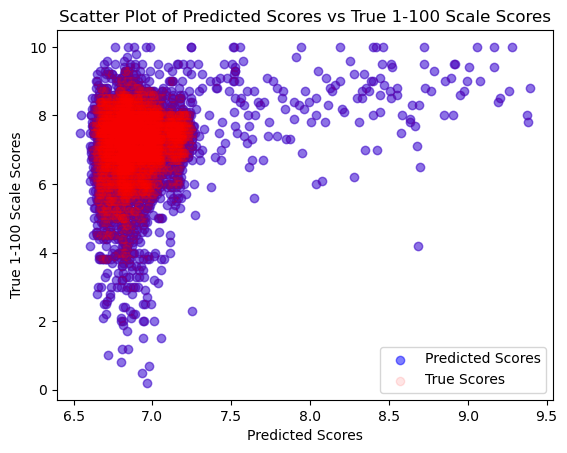

In [114]:
plt.scatter(y_pred.flatten(), y_test, color='blue', label='Predicted Scores', alpha=.5)
plt.xlabel('Predicted Scores')

# Assuming 'true_scores' is the actual true 1-100 scale scores
plt.scatter(y_pred.flatten(), y_test, color='red', label='True Scores', alpha=.1)
plt.ylabel('True 1-100 Scale Scores')

plt.title('Scatter Plot of Predicted Scores vs True 1-100 Scale Scores')
plt.legend()
plt.show()

In [117]:
# Save the model
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets
